### Coding with Qiskit Episode 3

# Hello World!

In this episode of Coding with Qiskit, we built our first Hello World application.

The application first entangled two qubits which were initially in the state $\vert00\rangle$. Then, we noted the results by running the application on a simulator as well as real quantum hardware at IBM.

This Jupyter notebook shows the code that was used in the video, as well as updates in the latest version of Qiskit.

**Link to Episode 3:** https://www.youtube.com/watch?v=RrUTwq5jKM4

In [1]:
from IPython.display import IFrame
IFrame(src="http://www.youtube.com/embed/RrUTwq5jKM4", width=1920/2, height=1080/2)

# Building the circuit

We begin by importing Qiskit.

In [14]:
from qiskit import *
from qiskit_aer import Aer

In the video, we initialized two qubits into a `QuantumRegister` and two classical bits into a `ClassicalRegister` by writing

In [15]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

Then we built a `QuantumCircuit` composed of the two classical and quantum bits by saying

In [16]:
circuit = QuantumCircuit(qr, cr)

The above three lines of code can be simplified into one line by writing

where the first argument is the number of quantum bits, and the second argument is the number of classical bits. This is the recommended way of creating circuits.

Once you create your circuit, you can draw it at any point by writing

In [17]:
circuit.draw()

q1_0: 
      
q1_1: 
      
c1: 2/

For a plot based on `matplotlib`, use instead

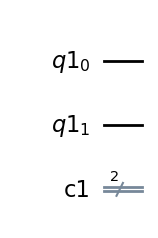

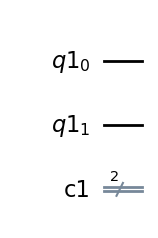

In [18]:
%matplotlib inline 
circuit.draw(output='mpl')

Note that you only need to run the `%matplotlib inline` command once in your notebook.

Next, let's add the gates.

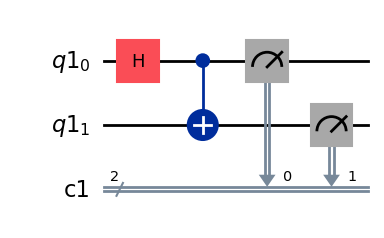

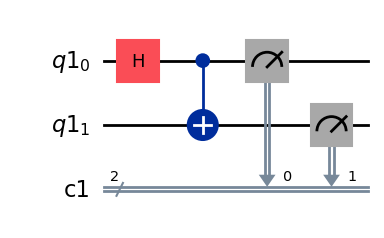

In [19]:
# the quantum circuit has two qubits. they are indexed as qubits 0 and 1
circuit.h(0)
circuit.cx(0,1) # order is control, target
circuit.measure([0,1], [0,1]) # qubits [0,1] are measured and results are stored in classical bits [0,1] in order
circuit.draw(output='mpl')

# Running on a simulator

We begin by setting the simulator to `qasm_simulator` from the Aer element of Qiskit.

In [20]:
simulator = Aer.get_backend('qasm_simulator')

Then, we execute the circuit on the simulator and store the results in a variable called `result`.

In [21]:
result = simulator.run(circuit).result()

At this point, we are ready to plot the results of the simulator execution. To do this, first import the visualization tools from Qiskit using

In [22]:
from qiskit.visualization import plot_histogram

Then, we plot the results using

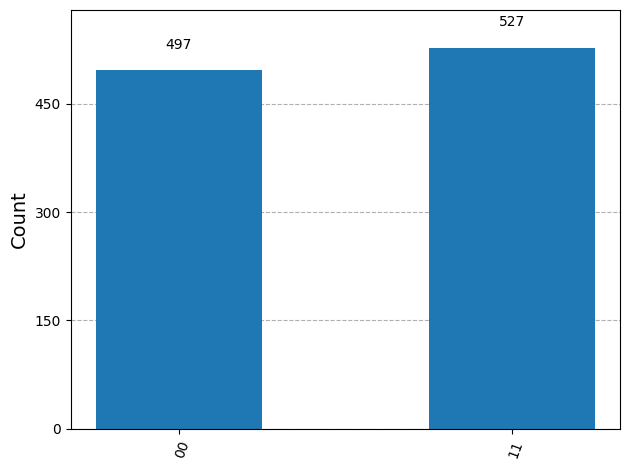

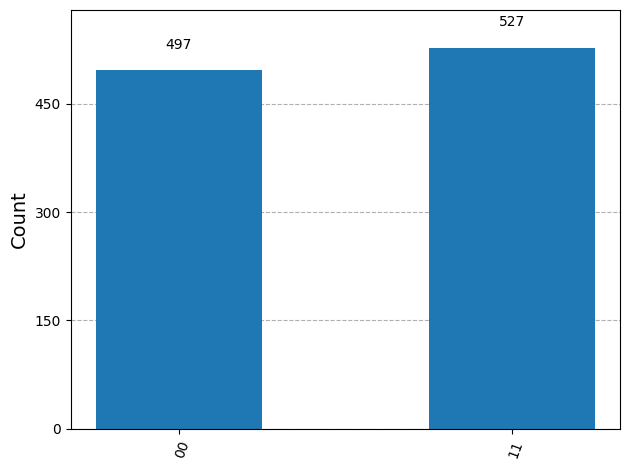

In [23]:
plot_histogram(result.get_counts(circuit))

# Running on real quantum hardware

In order to run the circuit on real quantum hardware at IBM, we begin by loading our saved IBMQ account using

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

Then, we choose the backend that we want to use in our run. In the video, we used

In [29]:
qcomp = provider.get_backend('ibmq_16_melbourne')

NameError: name 'provider' is not defined

Generally, if you have no preference on which backend you'd like to use, you can just ask for the least busy backend by using

In [15]:
num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_16_melbourne


Once the backend is selected, we are ready to run the circuit just as before using the `execute` function. Before doing so, a useful feature is to run the job watcher that is available in the latest version of Qiskit using

In [ ]:
import qiskit.tools.jupyter
%qiskit_job_watcher

In [17]:
job = execute(circuit, backend=qcomp)

You can also monitor the job progress inline using the job monitor:

In [18]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


Once the job runs sucessfully, we can visualize the results using `plot_histogram` as before using

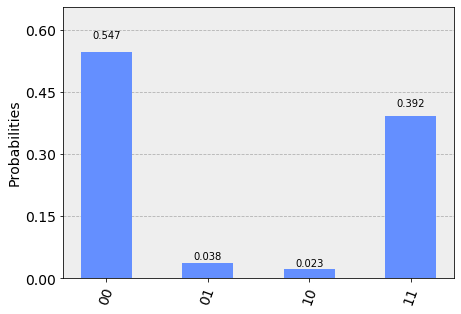

In [19]:
result = job.result()
plot_histogram(result.get_counts(circuit))

You can close the job watcher window by using

In [20]:
%qiskit_disable_job_watcher

# References

For detailed information about Qiskit, check out the tutorials in the Github repository:

https://github.com/Qiskit/qiskit-iqx-tutorials

# Version

It's good to note the Qiskit version that was used in your work. One way to do this is print the version at the bottom of the Jupyter notebook using

In [21]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

In [22]:
%qiskit_copyright